In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

C:\Users\Alex\AppData\Local\Temp\ipykernel_13516\685342964.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
cars = pd.DataFrame({'model': ['Renault','Hyundai', 'KIA', 'Toyota'],
                     'stock' : [12, 36, 28, 32]})
cars

,model,stock
0,Renault,12
1,Hyundai,36
2,KIA,28
3,Toyota,32


<BarContainer object of 4 artists>

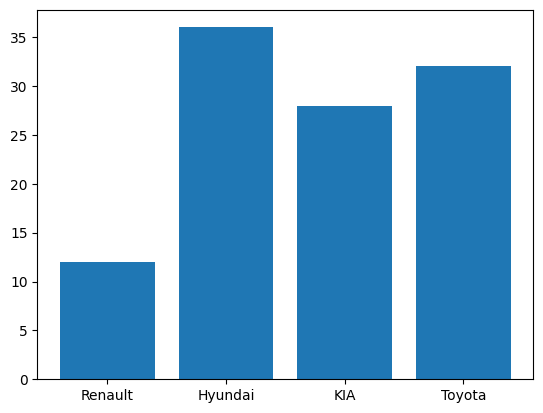

In [3]:
plt.bar(cars.model,cars.stock)

In [4]:
# соберем данные об уровне удовлетворенности десяти человек
satisfaction = pd.DataFrame({'sat_level': ['Good', 'Medium', 'Good', 'Medium', 'Bad', 'Medium', 'Good', 'Medium', 'Medium', 'Bad']})
 
satisfaction

,sat_level
0,Good
1,Medium
2,Good
3,Medium
4,Bad
5,Medium
6,Good
7,Medium
8,Medium
9,Bad


C:\Users\Alex\AppData\Local\Temp\ipykernel_13516\1197207035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'sat_level', data = satisfaction,palette='viridis')


<Axes: xlabel='sat_level', ylabel='count'>

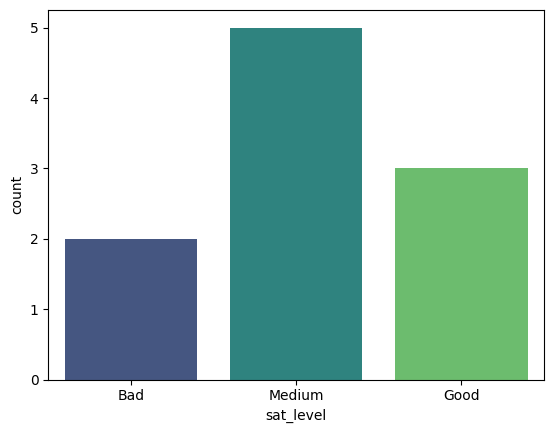

In [5]:
# переведем данные в тип categorical
satisfaction.sat_level = pd.Categorical(satisfaction.sat_level, categories = ['Bad', 'Medium', 'Good'], ordered = True)
 
# построим столбчатую диаграмму типа countplot с количеством оценок в каждой из категорий
sns.countplot(x = 'sat_level', data = satisfaction,palette='viridis')

In [6]:
# Распределение Пуассона

In [7]:
# передадим функции np.random.poisson()
# матожидание (lam) и желаемое количество экспериментов (size)
res = np.random.poisson(lam = 3, size = 1000)
 
# выведем первые 10 значений
res[:10]

array([2, 3, 1, 2, 5, 2, 4, 5, 2, 2])

In [8]:
# для этого воспользуемся знакомой нам функцией np.unique()
unique, counts = np.unique(res, return_counts = True)
unique, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 50, 165, 223, 224, 159,  94,  53,  20,   9,   1,   2], dtype=int64))

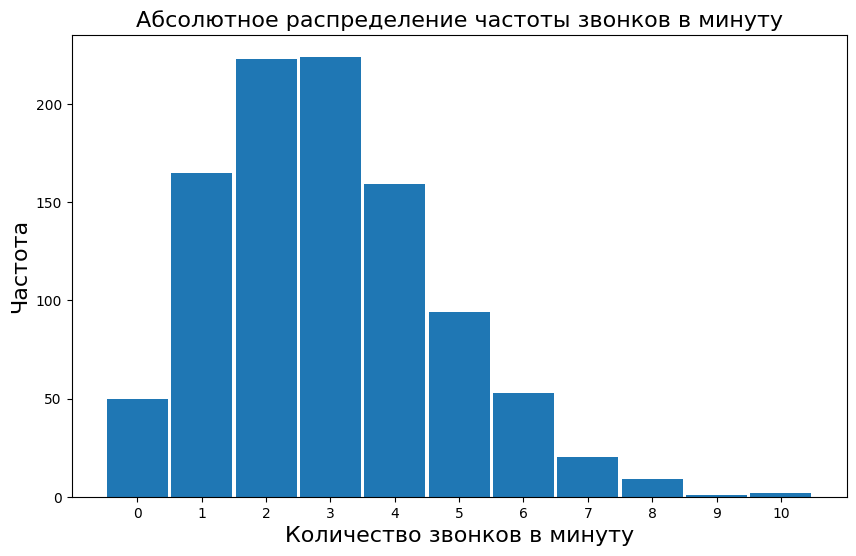

In [9]:
plt.figure(figsize=(10,6))
plt.bar([str(x) for x in unique], counts, width = 0.95)
plt.title('Абсолютное распределение частоты звонков в минуту', fontsize = 16)
plt.xlabel('Количество звонков в минуту', fontsize = 16)
plt.ylabel('Частота', fontsize = 16);

Text(0, 0.5, 'Относительная частота')

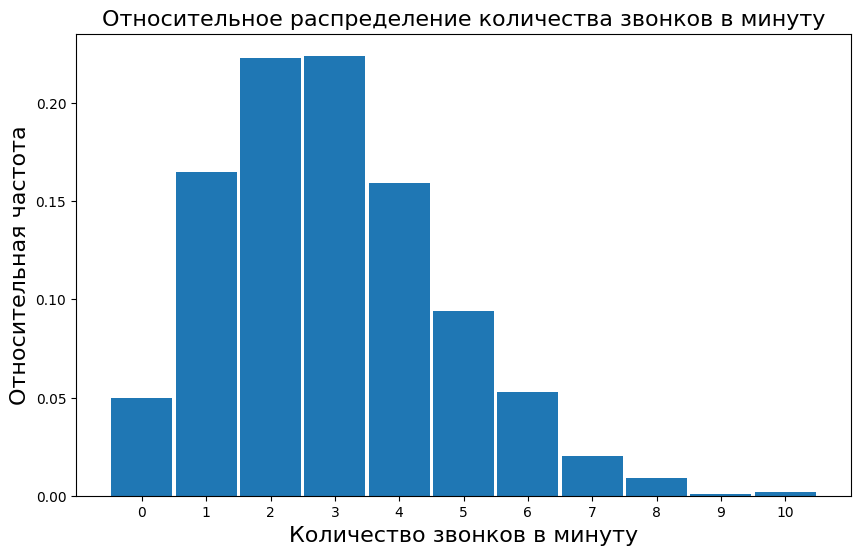

In [10]:
plt.figure(figsize = (10,6))
# теперь посмотрим на относительное распределение количества звонков в минуту
# для этого просто разделим количество звонков в каждом из столбцов на общее число звонков
plt.bar([str(x) for x in unique], counts / len(res), width = 0.95)
plt.title('Относительное распределение количества звонков в минуту', fontsize = 16)
plt.xlabel('Количество звонков в минуту', fontsize = 16)
plt.ylabel('Относительная частота', fontsize = 16)

In [11]:
# разделим число наблюдений, в которых было более шести звонков, на их общее количество
np.round(len(res[res > 6])/len(res), 3)

0.032

In [12]:
np.round(len(res[res <= 6])/len(res) - len(res[res < 2])/len(res), 3)

0.753

Text(0, 0.5, 'Относительная частота')

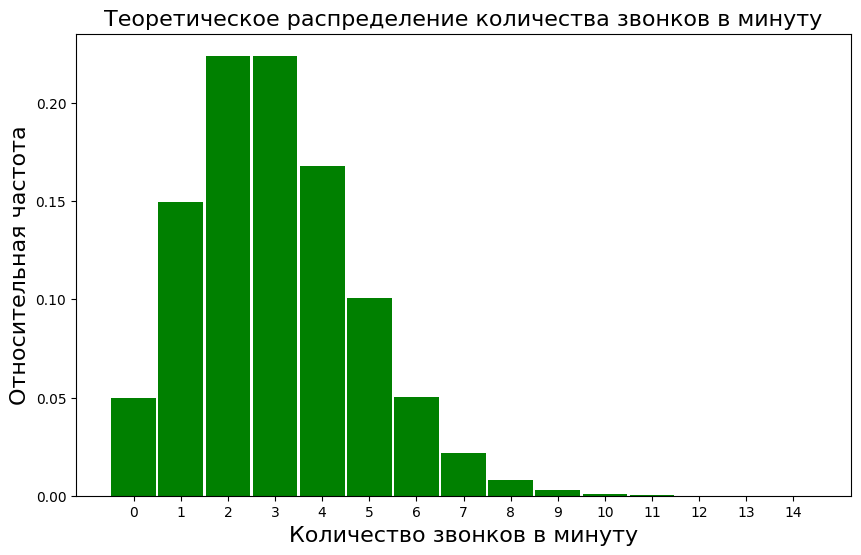

In [13]:
# построим график теоретической вероятности
from scipy.stats import poisson
 
# создадим последовательность целых чисел от 0 до 14
x = np.arange(15)
# передадим их в функцию poisson.pmf()
# mu в данном случае это матожидание (lambda из формулы)
f = poisson.pmf(x, mu = 3)
 
# построим график теоретического распределения, изменив для наглядности его цвет
plt.figure(figsize = (10,6))
plt.bar([str(x) for x in x], f, width = 0.95, color = 'green')
plt.title('Теоретическое распределение количества звонков в минуту', fontsize = 16)
plt.xlabel('Количество звонков в минуту', fontsize = 16)
plt.ylabel('Относительная частота', fontsize = 16)

In [14]:
# на графике это сумма площадей первого и второго столбцов
poisson.cdf(1, 3).round(3)

0.199

In [15]:
# найдем площадь столбцов до шести звонков в минуту включительно
# и вычтем результат из единицы
np.round(1 - poisson.cdf(6, 3), 3)

0.034

In [16]:
# для выполнения второго задания площадь столбцов ноль и один
# из площади столбцов до шестого включительно
np.round(poisson.cdf(6, 3) - poisson.cdf(1, 3), 3)

0.767

In [17]:
csect = pd.DataFrame({'countries':['France','Belgum','Spain'],
                    'healthcare': [4492,5428,3616],
                    'education':[9210,10869,6498]})
csect

,countries,healthcare,education
0,France,4492,9210
1,Belgum,5428,10869
2,Spain,3616,6498


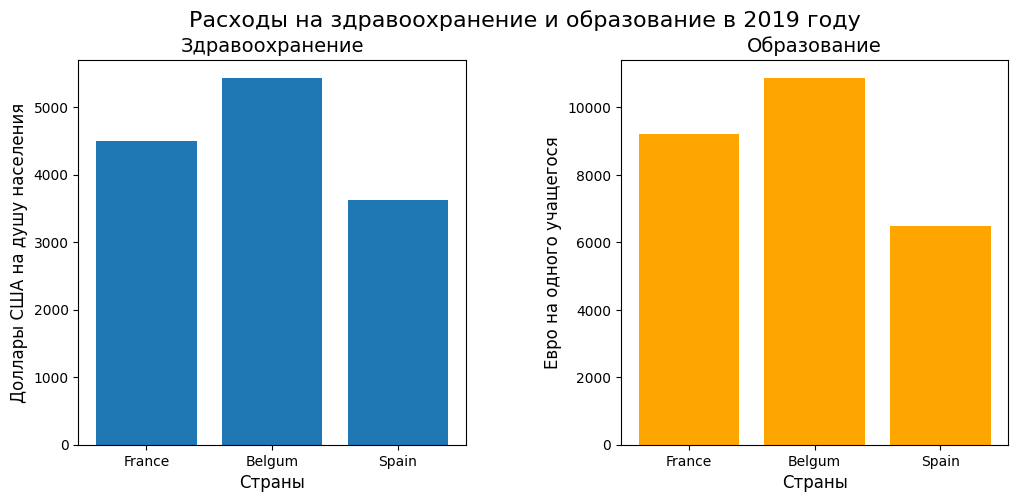

In [18]:
# зададим размер фигуры для обоих графиков
plt.figure(figsize = (12,5))
 
# используем функцию plt.subplot() для создания первого графика (index = 1)
# передаваемые параметры: nrows, ncols, index
plt.subplot(121)
# построим столбчатую диаграмму для здравоохранения
plt.bar(csect.countries, csect.healthcare)
plt.title('Здравоохранение', fontsize = 14)
plt.xlabel('Страны', fontsize = 12)
plt.ylabel('Доллары США на душу населения', fontsize = 12)
 
# создадим второй график (index = 2)
# параметры можно передать одним числом
plt.subplot(122)
# построим столбчатую диаграмму для образования
plt.bar(csect.countries, csect.education, color = 'orange')
plt.title('Образование', fontsize = 14)
plt.xlabel('Страны', fontsize = 12)
plt.ylabel('Евро на одного учащегося', fontsize = 12)
 
# отрегулируем пространство между графиками
plt.subplots_adjust(wspace = 0.4)
 
# зададим общий график
plt.suptitle('Расходы на здравоохранение и образование в 2019 году ', fontsize = 16)
 
# выведем результат
plt.show()

In [19]:
# Временные ряды

In [20]:
# создадим временной ряд расходов на здравоохранение во Франции с 2010 по 2019 годы
tseries = pd.DataFrame({'year' :       [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
                        'healthcare' : [4598, 4939, 4651, 4902, 4999, 4208, 4268, 4425, 4690, 4492]})
 
# превратим год в объект datetime
tseries.year = pd.to_datetime(tseries.year, format = '%Y')
# и сделаем этот столбец индексом
tseries.set_index('year', drop = True, inplace = True)
 
# посмотрим на результат
tseries

,healthcare
year,
2010-01-01,4598
2011-01-01,4939
2012-01-01,4651
2013-01-01,4902
2014-01-01,4999
2015-01-01,4208
2016-01-01,4268
2017-01-01,4425
2018-01-01,4690


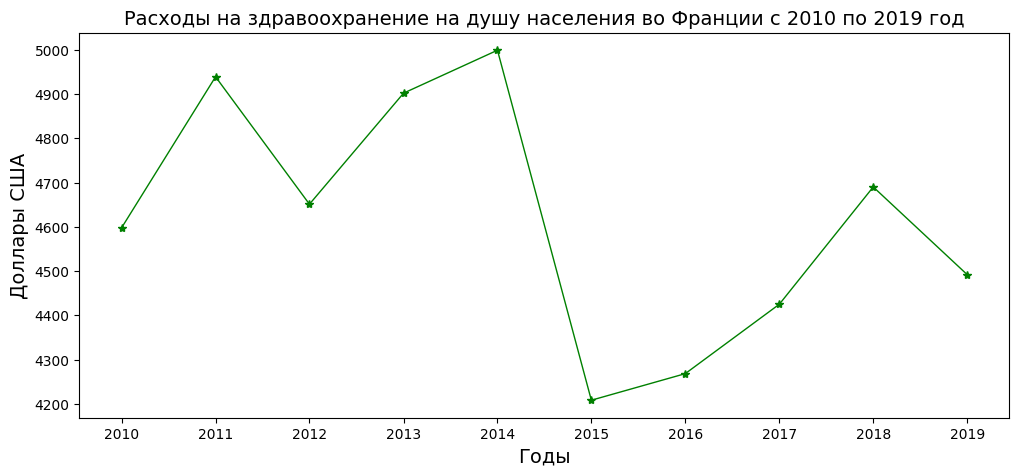

In [21]:
# зададим размер графика
plt.figure(figsize = (12,5))
# дополнительно укажем цвет, толщину линии и вид маркера
plt.plot(tseries, color = 'green', linewidth = 1, marker = '*')
 
# добавим подписи к осям и заголовок
plt.xlabel('Годы', fontsize = 14)
plt.ylabel('Доллары США', fontsize = 14)
plt.title('Расходы на здравоохранение на душу населения во Франции с 2010 по 2019 год', fontsize = 14)
 
# выведем результат
plt.show()

In [22]:
# Панельные данные

In [23]:
# Теперь, если объединить анализ расходов на здравоохранение по нескольким странам (перекрестные данные) с измерением этих данных во времени (временные ряды), мы получим то, что принято называть панельными данными (panel data).

In [24]:
# Создание датафрейма с панельными данными

In [25]:
# первые пять цифр относятся к Франции, вторые пять - к Бельгии, третьи пять - к Испании
pdata = pd.DataFrame({'healthcare' : [4208, 4268, 4425, 4690, 4492, 4290, 4323, 4618, 4913, 4960, 2349, 2377, 2523, 2736, 2542]})


In [26]:
# создадим кортежи для иерархического индекса
rows = [('France', '2015'),
        ('France', '2016'),
        ('France', '2017'),
        ('France', '2018'),
        ('France', '2019'),
        ('Belgium', '2015'),
        ('Belgium', '2016'),
        ('Belgium', '2017'),
        ('Belgium', '2018'),
        ('Belgium', '2019'),
        ('Spain', '2015'),
        ('Spain', '2016'),
        ('Spain', '2017'),
        ('Spain', '2018'),
        ('Spain', '2019')]
 
# передадим кортежи в функцию pd.MultiIndex.from_tuples(),
# указав названия уровней индекса
custom_multindex = pd.MultiIndex.from_tuples(rows, names = ['country', 'year'])
 
# сделаем custom_multindex индексом датафрейма с панельными данными
pdata.index = custom_multindex
 
# посмотрим на результат
pdata

healthcare
country year            
France  2015        4208
        2016        4268
        2017        4425
        2018        4690
        2019        4492
Belgium 2015        4290
        2016        4323
        2017        4618
        2018        4913
        2019        4960
Spain   2015        2349
        2016        2377
        2017        2523
        2018        2736
        2019        2542

In [27]:
# Визуализация панельных данных

In [28]:
# сделаем данные по странам (index level = 0) отдельными столбцами
pdata_unstacked = pdata.healthcare.unstack(level = 0)
 
# метод .unstack() выстроит столбцы в алфавитном порядке
pdata_unstacked

country,Belgium,France,Spain
year,,,
2015,4290,4208,2349
2016,4323,4268,2377
2017,4618,4425,2523
2018,4913,4690,2736
2019,4960,4492,2542


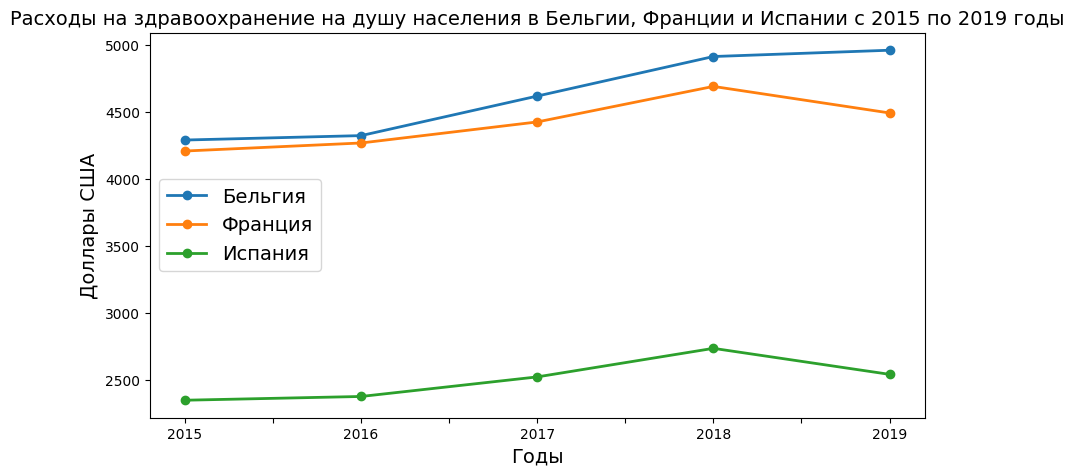

In [29]:
# зададим размер графика
plt.figure(figsize = (10,5))
 
# построим три кривые
pdata_unstacked.Belgium.plot(linewidth = 2, marker = 'o', label = 'Бельгия')
pdata_unstacked.France.plot(linewidth = 2, marker = 'o', label = 'Франция')
pdata_unstacked.Spain.plot(linewidth = 2, marker = 'o', label = 'Испания')
 
# дополним подписями к осям, заголовком и легендой
plt.xlabel('Годы', fontsize = 14)
plt.ylabel('Доллары США', fontsize = 14)
plt.title('Расходы на здравоохранение на душу населения в Бельгии, Франции и Испании с 2015 по 2019 годы', fontsize = 14)
plt.legend(loc = 'center left', prop = {'size': 14})
 
plt.show()

Text(0.5, 0.98, 'Расходы на здравоохранение с 2015 по 2019 годы')

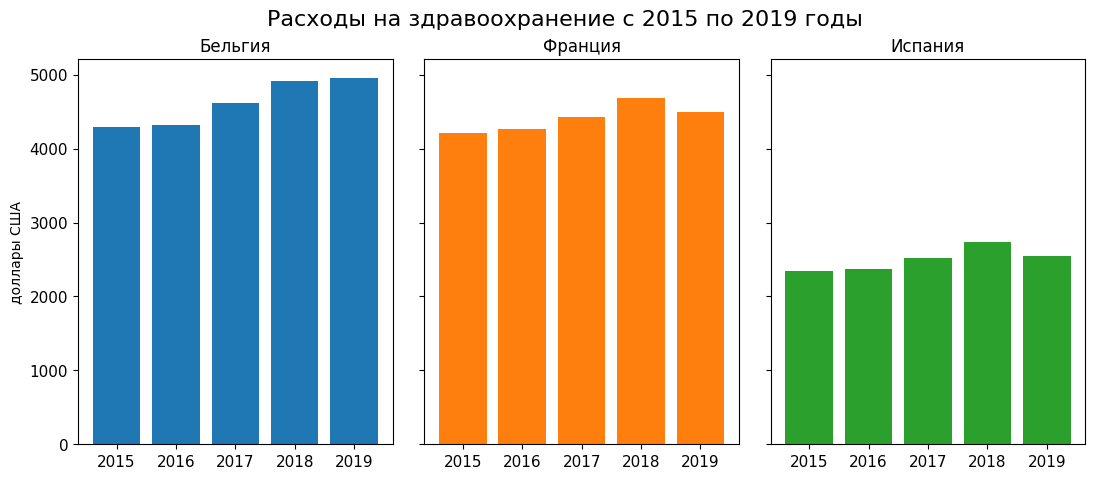

In [30]:
pdata_unstacked.plot(kind = 'bar', # создадим столбчатые диаграммы,
                     subplots = True, # которые разместим на подграфиках
                     layout = (1, 3), # на сетке из одной строки и трех столбцов
                     rot = 0, # сдедаем подписи по оси x горизонтальными
                     figsize = (13, 5), # зададим внешний размер для трех графиков
                     sharey = True, # важно иметь одинаковую шкалу по оси y для сравнения расходов
                     fontsize = 11, # зададим размер шрифта единиц измерения по обеим шкалам и
                     width = 0.8, # ширину столбцов
                     xlabel = '', # кроме того, убираем подписи к годам
                     ylabel = 'доллары США', # ставим подпись по оси y
                     legend = None, # убираем легенду
                     title = ['Бельгия', 'Франция', 'Испания']) # пишем названия столбцов по-русски
 
# регулируем ширину между графиками
plt.subplots_adjust(wspace = 0.1)
 
# добавляем общий заголовок
plt.suptitle('Расходы на здравоохранение с 2015 по 2019 годы', fontsize = 16)

In [31]:
# Одномерный и многомерный анализ

In [32]:
# При одномерном анализе (univariate analysis) мы сосредоточены на изучении одного единственного показателя. Многомерный анализ (multivariate analysis) предполагает, что мы изучаем сразу несколько признаков.

# Представленные выше перекрестные данные с расходами на здравоохранение и образование — это пример многомерного анализа. Временной ряд и панельные данные, касающиеся только расходов на здравоохранение — это одномерный анализ.

# Для наглядности приведем пример многомерных временных рядов (multivariate time series) и панельных данных (multivariate panel data).

In [33]:
# Многомерный временной ряд

In [34]:
# подготовим данные
tseries_mult = pd.DataFrame({'year' :       [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
                             'healthcare' : [4598, 4939, 4651, 4902, 4999, 4208, 4268, 4425, 4690, 4492],
                             'education' :  [5.69, 5.52, 5.46, 5.50, 5.51, 5.46, 5.48, 5.45, 5.41, 6.62]})
 
# превратим год в объект datetime
tseries_mult.year = pd.to_datetime(tseries_mult.year, format = '%Y')
# и сделаем этот столбец индексом
tseries_mult.set_index('year', drop = True, inplace = True)
 
# посмотрим на результат
tseries_mult

,healthcare,education
year,,
2010-01-01,4598,5.69
2011-01-01,4939,5.52
2012-01-01,4651,5.46
2013-01-01,4902,5.50
2014-01-01,4999,5.51
2015-01-01,4208,5.46
2016-01-01,4268,5.48
2017-01-01,4425,5.45
2018-01-01,4690,5.41


In [35]:
# вначале создадим датафрейм с данными расходов на здравоохранение и образование трех стран с 2015 по 2019 годы
pdata_mult = pd.DataFrame({'healthcare, per capita' : [4208, 4268, 4425, 4690, 4492, 4290, 4323, 4618, 4913, 4960, 2349, 2377, 2523, 2736, 2542],
                           'education, % of GDP'  : [5.46, 5.48, 5.45, 5.41, 6.62, 6.45, 6.46, 6.43, 6.38, 6.40, 4.29, 4.23, 4.21, 4.18, 4.26]})
 
# создадим кортежи для иерархического индекса
rows = [('France', '2015'),
        ('France', '2016'),
        ('France', '2017'),
        ('France', '2018'),
        ('France', '2019'),
        ('Belgium', '2015'),
        ('Belgium', '2016'),
        ('Belgium', '2017'),
        ('Belgium', '2018'),
        ('Belgium', '2019'),
        ('Spain', '2015'),
        ('Spain', '2016'),
        ('Spain', '2017'),
        ('Spain', '2018'),
        ('Spain', '2019')]
 
# передадим кортежи в функцию pd.MultiIndex.from_tuples(),
# указав названия уровней индекса
custom_multindex = pd.MultiIndex.from_tuples(rows, names = ['country', 'year'])
 
# сделаем custom_multindex индексом датафрейма с панельными данными
pdata_mult.index = custom_multindex
 
# посмотрим на результат
pdata_mult

healthcare, per capita  education, % of GDP
country year                                             
France  2015                    4208                 5.46
        2016                    4268                 5.48
        2017                    4425                 5.45
        2018                    4690                 5.41
        2019                    4492                 6.62
Belgium 2015                    4290                 6.45
        2016                    4323                 6.46
        2017                    4618                 6.43
        2018                    4913                 6.38
        2019                    4960                 6.40
Spain   2015                    2349                 4.29
        2016                    2377                 4.23
        2017                    2523                 4.21
        2018                    2736                 4.18
        2019                    2542                 4.26

In [36]:
# Задачи EDA

In [37]:
#  ходе исследовательского анализа данных нам необходимо решить три основные задачи:
# --описать данные
# --найти различия
# --выявить закономерности

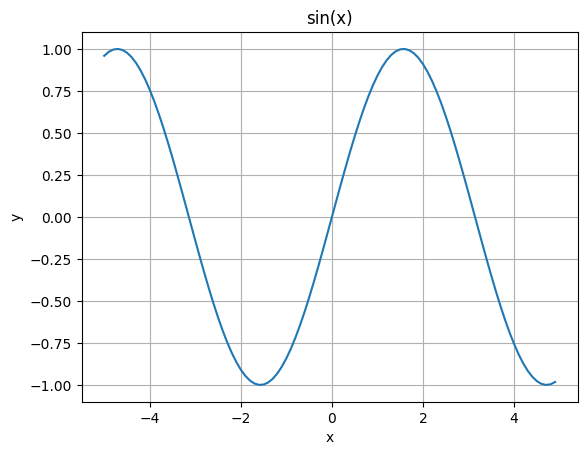

In [38]:
# зададим последовательность от -5 до 5 с шагом 0,1
x = np.arange(-5, 5, 0.1)
 
# построим график синусоиды
plt.plot(x, np.sin(x))
 
# зададим заголовок, подписи к осям и сетку
plt.title('sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid();

In [39]:
# создадим объект класса figure
fig = plt.figure()
 
# и посмотрим на его тип
print(type(fig))

<class 'matplotlib.figure.Figure'>


<Figure size 640x480 with 0 Axes>

In [40]:
# применим метод .add_subplot() для создания подграфика (объекта ax)
# напомню, что первые два параметра задают количество строк и столбцов
# третий параметр - это индекс (порядковый номер подграфика)
ax = fig.add_subplot(2, 1, 1)
 
# посмотрим на тип этого объекта
print(type(ax))

<class 'matplotlib.axes._axes.Axes'>


In [41]:
fig.number

1

In [42]:
# Приведем пример наполнения подграфиков.

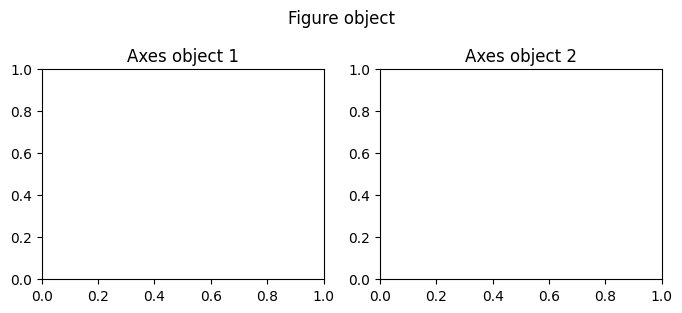

In [43]:
# вначале создаем объект figure, указываем размер объекта
fig = plt.figure(figsize = (8,6))
# и его заголовок с помощью метода .suptitle()
fig.suptitle('Figure object')
# можно и plt.suptitle('Figure object')
 
# внутри него создаем первый объекта класса axes
ax1 = fig.add_subplot(2, 2 ,1)
# к этому объекту можно применять различные методы
ax1.set_title('Axes object 1')
 
# и второй (напомню, параметры можно передать без запятых)
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('Axes object 2')
 
# выведем результат
plt.show()

<Axes: xlabel='year'>

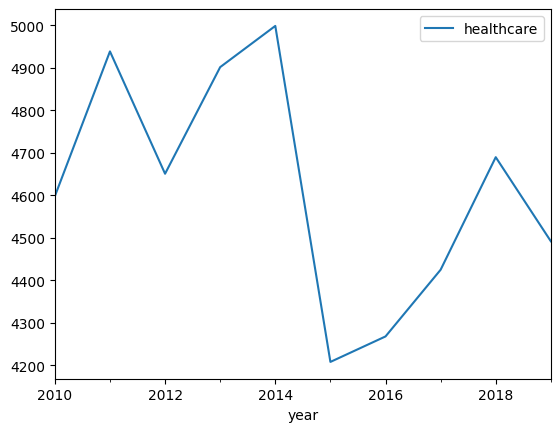

In [44]:
# в этом несложно убедиться, если не убирать служебные записи при построении графиков
tseries.plot()

In [45]:
# по оси x разместим страны, по оси y - признаки
# параметр barmode = 'group' указывает, 
# что столбцы образования и здравоохранения нужно разместить рядом,
# а не внутри одного столбца (stacked)
px.bar(csect, x = 'countries', y = ['healthcare', 'education'], barmode = 'group')